<a href="https://colab.research.google.com/github/kalyan8324/Machine_leaning/blob/master/KNN_Algoritham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier as knn
sns.set()


In [ ]:
breast_cancer = load_breast_cancer()
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# spliting data into train set and test set
X = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
X = X[['mean area', 'mean compactness']]

y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train ,len(y_train)

(     mean area  mean compactness
 562      716.9           0.20870
 291      687.3           0.09823
 16       684.5           0.07200
 546      324.9           0.04994
 293      432.7           0.05642
 ..         ...               ...
 129     1192.0           0.15890
 144      355.3           0.05139
 72       929.4           0.18300
 235      603.4           0.06945
 37       523.8           0.03766
 
 [426 rows x 2 columns],
 426)

In [ ]:
y_pred = knn(n_neighbors=5).fit(X_train, y_train).predict(X_test)
# y_pred = knn.predict(X_test)
y_pred


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([ True,  True,  True, False, False, False, False, False,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True, False,

array([[42, 13],
       [ 9, 79]])

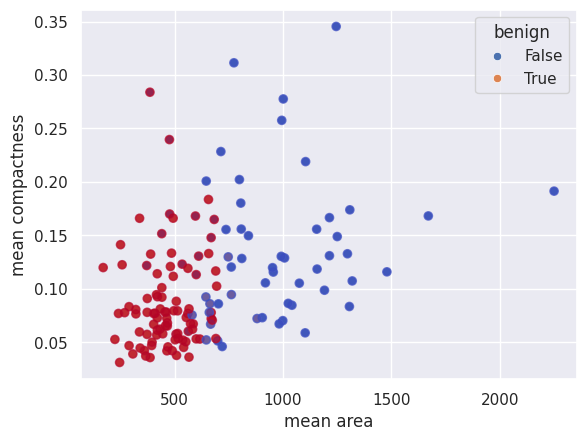

In [ ]:
sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)
confusion_matrix(y_test, y_pred)